In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import random

In [6]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0]**2 + 0.05 * np.random.rand(100)

In [7]:
import pandas as pd

df = pd.DataFrame()

In [8]:
df['X'] = X.reshape(100)
df['y'] = y

In [9]:
X

array([[-0.12545988],
       [ 0.45071431],
       [ 0.23199394],
       [ 0.09865848],
       [-0.34398136],
       [-0.34400548],
       [-0.44191639],
       [ 0.36617615],
       [ 0.10111501],
       [ 0.20807258],
       [-0.47941551],
       [ 0.46990985],
       [ 0.33244264],
       [-0.28766089],
       [-0.31817503],
       [-0.31659549],
       [-0.19575776],
       [ 0.02475643],
       [-0.06805498],
       [-0.20877086],
       [ 0.11185289],
       [-0.36050614],
       [-0.20785535],
       [-0.13363816],
       [-0.04393002],
       [ 0.28517596],
       [-0.30032622],
       [ 0.01423444],
       [ 0.09241457],
       [-0.45354959],
       [ 0.10754485],
       [-0.32947588],
       [-0.43494841],
       [ 0.44888554],
       [ 0.46563203],
       [ 0.30839735],
       [-0.19538623],
       [-0.40232789],
       [ 0.18423303],
       [-0.05984751],
       [-0.37796177],
       [-0.00482309],
       [-0.46561148],
       [ 0.4093204 ],
       [-0.24122002],
       [ 0

In [10]:
df

,X,y
0,-0.125460,0.048792
1,0.450714,0.641251
2,0.231994,0.177181
3,0.098658,0.054629
4,-0.343981,0.400348
...,...,...
95,-0.006204,0.017576
96,0.022733,0.037848
97,-0.072459,0.060606
98,-0.474581,0.720035


In [11]:
df.shape

(100, 2)

Text(0.5, 1.0, 'X vs y')

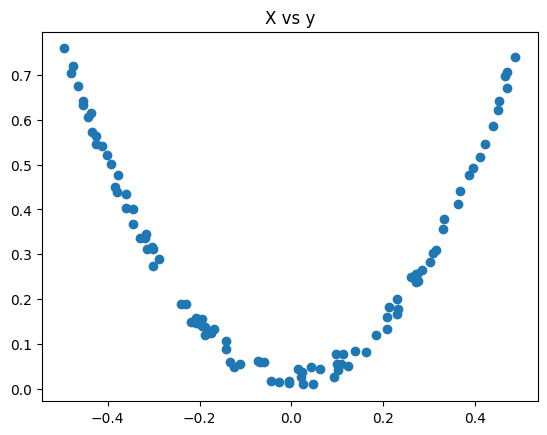

In [15]:
plt.scatter(df['X'], df['y'])
plt.title('X vs y')

In [16]:
df['pred1'] = df['y'].mean()

In [17]:
df

,X,y,pred1
0,-0.125460,0.048792,0.290404
1,0.450714,0.641251,0.290404
2,0.231994,0.177181,0.290404
3,0.098658,0.054629,0.290404
4,-0.343981,0.400348,0.290404
...,...,...,...
95,-0.006204,0.017576,0.290404
96,0.022733,0.037848,0.290404
97,-0.072459,0.060606,0.290404
98,-0.474581,0.720035,0.290404


In [18]:
df['res1'] = df['y'] - df['pred1']

In [19]:
df

,X,y,pred1,res1
0,-0.125460,0.048792,0.290404,-0.241612
1,0.450714,0.641251,0.290404,0.350847
2,0.231994,0.177181,0.290404,-0.113223
3,0.098658,0.054629,0.290404,-0.235775
4,-0.343981,0.400348,0.290404,0.109944
...,...,...,...,...
95,-0.006204,0.017576,0.290404,-0.272828
96,0.022733,0.037848,0.290404,-0.252556
97,-0.072459,0.060606,0.290404,-0.229798
98,-0.474581,0.720035,0.290404,0.429631


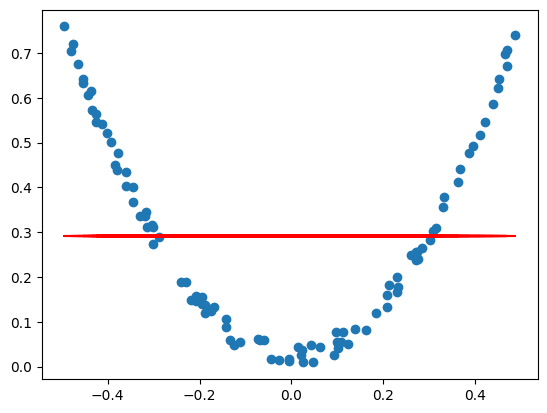

In [20]:
plt.scatter(df['X'], df['y'])
plt.plot(df['X'], df['pred1'], color='red')

In [21]:
from sklearn.tree import DecisionTreeRegressor

In [22]:
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)

In [23]:
tree1.fit(df['X'].values.reshape(100,1), df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

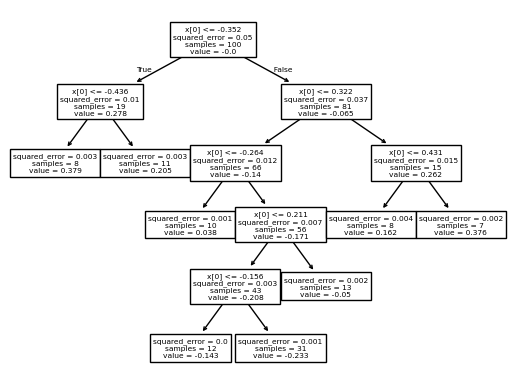

In [24]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

In [25]:
# generating X_tewst
X_test = np.linspace(-0.5, 0.5, 500)

In [26]:
y_pred = 	0.290404 + tree1.predict(X_test.reshape(500,1))

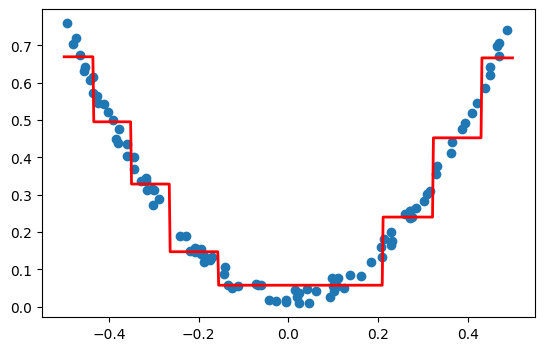

In [27]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2, color='red')
plt.scatter(df['X'], df['y'])

In [28]:
df['pred2'] = 	0.290404 + tree1.predict(df['X'].values.reshape(100, 1))

In [29]:
df

,X,y,pred1,res1,pred2
0,-0.125460,0.048792,0.290404,-0.241612,0.057509
1,0.450714,0.641251,0.290404,0.350847,0.666444
2,0.231994,0.177181,0.290404,-0.113223,0.240031
3,0.098658,0.054629,0.290404,-0.235775,0.057509
4,-0.343981,0.400348,0.290404,0.109944,0.328478
...,...,...,...,...,...
95,-0.006204,0.017576,0.290404,-0.272828,0.057509
96,0.022733,0.037848,0.290404,-0.252556,0.057509
97,-0.072459,0.060606,0.290404,-0.229798,0.057509
98,-0.474581,0.720035,0.290404,0.429631,0.669389


In [30]:
df['res2'] = df['y'] - df['pred2']

In [31]:
df

,X,y,pred1,res1,pred2,res2
0,-0.125460,0.048792,0.290404,-0.241612,0.057509,-0.008717
1,0.450714,0.641251,0.290404,0.350847,0.666444,-0.025193
2,0.231994,0.177181,0.290404,-0.113223,0.240031,-0.062849
3,0.098658,0.054629,0.290404,-0.235775,0.057509,-0.002880
4,-0.343981,0.400348,0.290404,0.109944,0.328478,0.071870
...,...,...,...,...,...,...
95,-0.006204,0.017576,0.290404,-0.272828,0.057509,-0.039933
96,0.022733,0.037848,0.290404,-0.252556,0.057509,-0.019660
97,-0.072459,0.060606,0.290404,-0.229798,0.057509,0.003098
98,-0.474581,0.720035,0.290404,0.429631,0.669389,0.050646


In [33]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)

In [34]:
tree2.fit(df['X'].values.reshape(100,1), df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [35]:
y_pred = 	0.290404 + sum(regressor.predict(X_test.reshape(-1,1)) for regressor in (tree1, tree2))

Text(0.5, 1.0, 'X vs y')

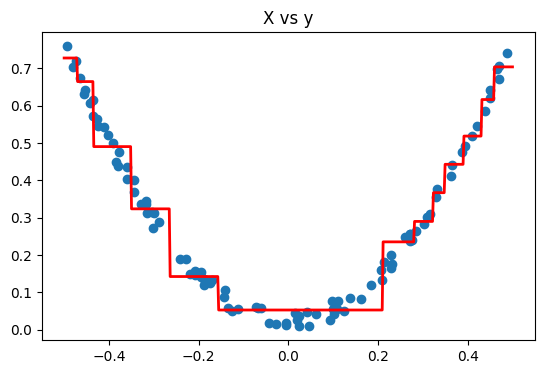

In [38]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2, color='red')
plt.scatter(df['X'], df['y'])
plt.title('X vs y')

In [39]:
def gradient_boost(X,y,number,lr,count=1,regs=[],foo=None):

  if number == 0:
    return
  else:
    # do gradient boosting

    if count > 1:
      y = y - regs[-1].predict(X)
    else:
      foo = y

    tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree_reg.fit(X, y)

    regs.append(tree_reg)

    x1 = np.linspace(-0.5, 0.5, 500)
    y_pred = sum(lr * regressor.predict(x1.reshape(-1, 1)) for regressor in regs)

    print(number)
    plt.figure()
    plt.plot(x1, y_pred, linewidth=2)
    plt.plot(X[:, 0], foo,"r.")
    plt.show()

    gradient_boost(X,y,number-1,lr,count+1,regs,foo=foo)

5


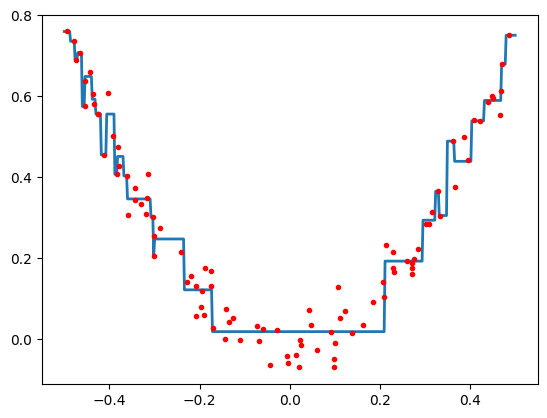

4


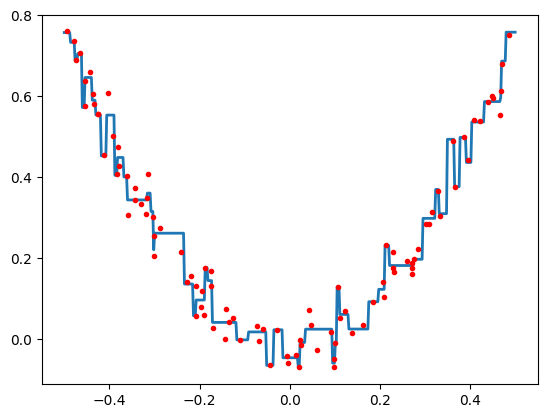

3


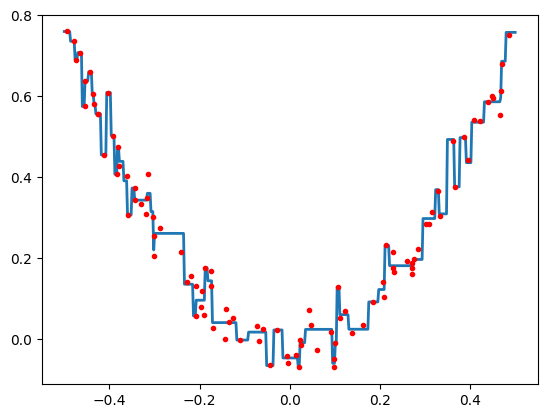

2


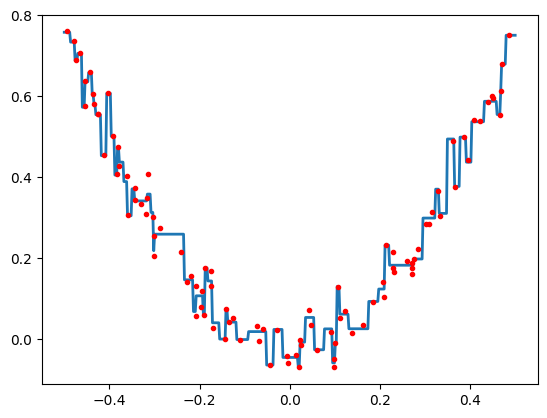

1


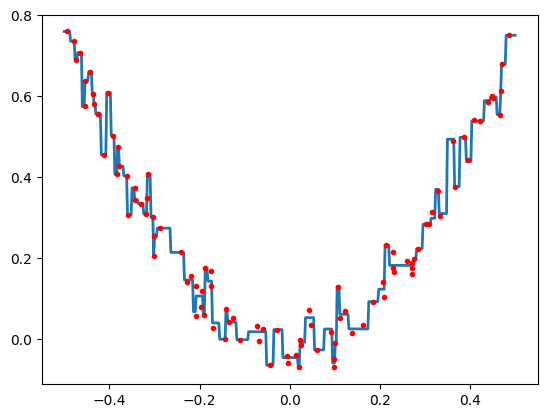

In [40]:

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
gradient_boost(X,y,5,lr=1)